<a href="https://colab.research.google.com/github/Mbatiany/Week8_Core/blob/main/Brendah's_Week8_CORE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Python Project to Predict Hypothyroidism

# 1.1 Introduction

Hypothyroidism (underactive thyroid) is a condition in which your thyroid gland doesn't produce enough of certain crucial hormones.

Hypothyroidism may not cause noticeable symptoms in the early stages. 

Over time, untreated hypothyroidism can cause a number of health problems, such as obesity, joint pain, infertility and heart disease.

Hence the need for early detection.

Hypothyroidism may be due to a number of factors.
        
* Risk factors

Although anyone can develop hypothyroidism, you're at an increased risk if you:

- Are a woman

- Are older than 60

- Have a family history of thyroid disease

- Have an autoimmune disease, such as type 1 diabetes or celiac disease

- Have been treated with radioactive iodine or anti-thyroid medications

- Received radiation to your neck or upper chest

- Have had thyroid surgery (partial thyroidectomy)

- Have been pregnant or delivered a baby within the past six months


https://www.mayoclinic.org/diseases-conditions/hypothyroidism/symptoms-causes/syc-20350284



## 1.1.1 Defining the Research Question

We aim to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

## 1.1.2 Metrics for Success

* Achieve an Accuracy above 85%
* Achieve F1 score above 85%




## 1.1.3 The Context

Nairobi Hospital conducted a clinical camp to test for hypothyroidism.

The data collected focused on Thyroid patients. 




## 1.1.4 Experimental design taken

* Loading & Viewing the Data
* Data Cleaning
* Exploratory Data Analysis:
      - Univariate
      - Bivariate
      - Multivariate
* Feature Engineering
* Modelling:
      - Random Forest Classifier
      - Ada Boost Classifier
      - Gradient Boosting Classifier
      - Support Vector Classifier
* Tuning the best model
* Challenge the solution
* Conclusion


## 1.1.5 Appropriateness of the available Data

Dataset link: http://bit.ly/hypothyroid_data

The features include:

- Age
- Sex
- on_thyroxine
- query_on_thyroxine
- on_antithyroid_medicationthyroid_surgery
- query_hypothyroid
- query_hyperthyroid
- pregnant
- sick
- tumor
- lithium
- goitre
- TSH_measured 
- TSH
- T3_measured
- T3
- TT4_measured
- TT4


Limitation: The data dictionary is not available hence:

the entry y is assumed to be yes, n as no, 
f as false, and t as true

# 1.2 Importing Libraries

In [1]:
!pip install --upgrade scikit-learn==0.20.3


     |████████████████████████████████| 5.4 MB 13.1 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.20.3 which is incompatible.


In [3]:
# Here we will import the python Libraries that I will use for analysis in this project

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline

from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.svm import SVC

plt.style.use('seaborn-talk')
from sklearn.datasets import make_blobs, make_circles
from mpl_toolkits import mplot3d
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import pandas_profiling as pp

import warnings
warnings.filterwarnings('ignore')

# 1.3 Loading our dataset/ Creating a DataFrame

In [4]:
# We create a DataFrame from our dataset 
# We will give a name -tsh

hp = pd.read_csv('hypothyroid.csv')


# EXPLORATORY DATA ANALYSIS

In [5]:
# Viewing the the first 5 observations in our dataset

hp.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [6]:
# Viewing the last five observations in our dataset
hp.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [7]:
# Checking the number of rows and columns in the dataset
hp.shape

(3163, 26)

The dataset has 3163 rows and 26 columns

In [8]:
# checking the columns in the dataset

hp.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [9]:
# Checking some summary information about our dataset

hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

Our data set has 3,163 rows and 26 columns. On closer inspection, we see that all our columns are categorical in nature. This lack of variability in data types is suspicious especially when we can see from the data set's preview that variables like 'age', 'T3', 'TSH', and so on should be numerical.



All the columns in the dataset have string data types including the numerical columns.

We will address this in data cleaning.

Since we cannot run a model using strings

In [10]:
# Checking some summary statistics about our dataset

hp.describe(include = 'all')


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


The data has special characters (?) that need to be addressed in data cleaning

In [11]:
# Checking the unique values in each column
# Using a for loop to iterate through the dataframe, 
# finding the unique values in each column then print them out 
#
#

for column in hp.columns:                              # Iterating through each column in the dataframe
  print(column)                                        # Printing the column name
  print(hp[column].unique())                           # Printing out the unique values in each column
  print(hp[column].nunique())                          # Printing out the number of unique values in each column
  print('\n++++++++++++++++++++++++++++++++++++++++++++++++++++++')      # Creating a new line filled with + to separate the columns

status
['hypothyroid' 'negative']
2

++++++++++++++++++++++++++++++++++++++++++++++++++++++
age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
93

++++++++++++++++++++++++++++++++++++++++++++++++++++++
sex
['M' 'F' '?']
3

++++++++++++++++++++++++++++++++++++++++++++++++++++++
on_thyroxine
['f' 't']
2

++++++++++++++++++++++++++++++++++++++++++++++++++++++
query_on_thyroxine
['f' 't']
2

++++++++++++++++++++++++++++++++++++++++++++++++++++++
on_antithyroid_medication
['f' 't']
2

++++++++++++++++++++++++++++++++++++++++++++++++++++++
thyroid_surgery
['f' 't']
2

+++++++++++++

As expected, we have found '?' in some of the columns like 'age', 'sex', 'TSH', and the rest of the columns that are supposed to be numerical.



# 1.4 DATA CLEANING 

## 1.4.1 Missing Values

In [12]:
# Checking for null values

hp.isnull().sum().sum()

0

We see  that there are no null values but we had seen the special character ? in some columns.

Hence we need to change that by replacing the ? with null values then impute them.

In [13]:
# Replacing the ? with missing values 

hp = hp.replace(['?'], np.nan)


In [14]:
# Checking the null values after replacing the ? with nan.

hp.isnull().sum().sum()

5329

We now have null values and can now impute them on column basis

In [15]:
# Checking null values by column

hp.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [16]:
# Checking the data types in the dataset

hp.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [17]:
# Changing the columns dtypes so that we can impute them
# Creating two lists, 
# A list of categorical columns
# A list of numerical columns

categorical_columns = ['sex', 'on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
                       'thyroid_surgery','query_hypothyroid','query_hyperthyroid', 'pregnant',
                       'sick','tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured', 
                       'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']
  
numerical_columns = ['age','TSH','T3', 'TT4', 'T4U', 'FTI' , 'TBG']


# Using a conditional for loop to convert each columns into the right data types respectively

for col in hp.columns:
  if col in numerical_columns:
    hp[col]= pd.to_numeric(hp[col])
  
  else:
    hp[col] = hp[col].astype('category')
    
    
# checking the data types to confirm changes

hp.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

Now our columns are in the right data types

Imputing Missing Values

* We will use different methods for different columns 
* Checking the columns with the measured values we see that in instances where the tests were not measured, there are null values
* Hence in those columns we should fill them with zero.

* for categorical columns we will fill them with mode
* while the age column will be filled with the mean

In [18]:
# Printing missing values by columns

hp.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [19]:
# Filling the missing values in the age column with mean

hp['age']= hp['age'].fillna(hp['age'].mean(), axis = 0)

In [20]:
# Filling the missing values in the sex column with mode

hp['sex']= hp['sex'].fillna(hp['sex'].mode()[0])

In [21]:
# Checking the null values in the measured columns
# Using a for loop and groupby function to confirm our observations

measured = ['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured']
unit = ['TSH','T3','TT4','T4U','FTI','TBG']

for i,j in zip(measured,unit):
 print(hp.groupby(i)[j].mean())


TSH_measured
n        NaN
y    5.92318
Name: TSH, dtype: float64
T3_measured
n         NaN
y    1.939749
Name: T3, dtype: float64
TT4_measured
n       NaN
y    108.85
Name: TT4, dtype: float64
T4U_measured
n         NaN
y    0.978199
Name: T4U, dtype: float64
FTI_measured
n           NaN
y    115.397771
Name: FTI, dtype: float64
TBG_measured
n          NaN
y    31.283077
Name: TBG, dtype: float64


We see that in instances where the tests were not measured, there are null values because the tests were not taken,

hence the entry should be zero which we will use to fillna

In [22]:
# filling the measured columns with 0
measured = ['TSH','T3','TT4','T4U','FTI','TBG']

hp[measured] =hp[measured].fillna(0)


In [23]:
hp.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

## 1.4.2 Duplicates

In [24]:
# checking for duplicates
hp.duplicated().sum()

77

There are 77 duplicated columns and we will drop them.

In [25]:
# Dropping for duplicates 

hp.drop_duplicates(inplace = True)

# Cconfriming that we no longer have duplicates

hp.duplicated().sum()

0

## 1.4.3 Outliers
In statistics, an outlier is a data point that differs significantly from other observations. 

An outlier may be due to variability in the measurement or it may indicate experimental error; 

the latter are sometimes excluded from the data set. 

An outlier can cause serious problems in statistical analyses.

### Boxplots

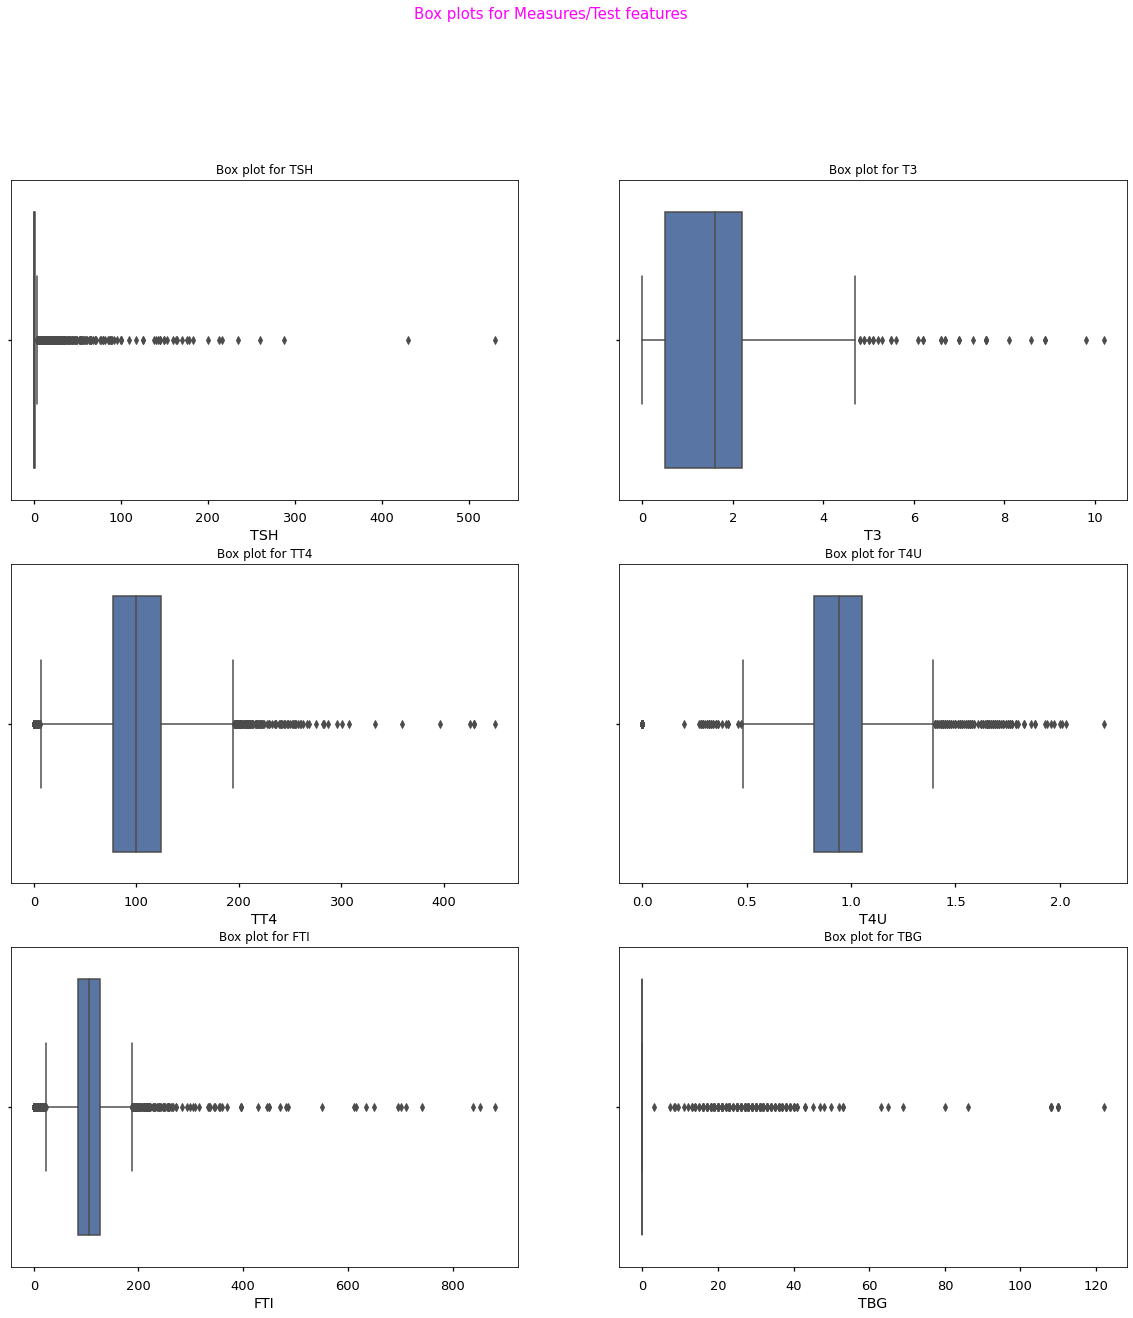

In [26]:
# We will use a boxplot to check for outliers
# we will use the list of measures/tests earlier created

# Specifying the chart we will use to plot the boxplots
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 20))

# labeling the title
fig.suptitle('Box plots for Measures/Test features', y= 1, color = 'magenta', fontsize = 15)

sns.set(style = 'whitegrid', context = 'notebook')

# Using a for loop to iterate through the measured list and plot respective boxplots
for ax, data, name in zip(axes.flatten(), hp, measured):
  sns.boxplot(hp[name], ax = ax)
  ax.set_title('Box plot for '+ name)
  
plt.show()  

All measured have plenty of outliers as shwon by the boxplots.

TT4, T4U and FTI have outliers on both sides of the boxplots (below Q1 and above Q4)

TSH, T3 and TBG have outliers on the right side i.e. above the Q4.

In [27]:
# We will not remove outliers for now

# we will create build a model when they are present, observe the results,

# then remove them accordingly.

# 1.5 EDA

## 1.5.1 Generic EDA ##

In [28]:
# get summary statistics
hp.describe(include = 'all')

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3086,3086.000000,3086,3086,3086,3086,3086,3086,3086,3086,3086,3086,3086,3086,3086,3086.000000,3086,3086.000000,3086,3086.000000,3086,3086.000000,3086,3086.000000,3086,3086.000000
unique,2,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN
top,negative,NaN,F,f,f,f,f,f,f,f,f,f,f,f,y,NaN,y,NaN,y,NaN,y,NaN,y,NaN,n,NaN
freq,2945,NaN,2192,2640,3031,3044,2983,2851,2851,3025,2989,3046,3084,2990,2631,NaN,2406,NaN,2846,NaN,2847,NaN,2848,NaN,2835,NaN
mean,NaN,51.118453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.952793,NaN,1.507583,NaN,100.252722,NaN,0.901850,NaN,106.582275,NaN,2.527090
std,NaN,17.854437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.276447,NaN,1.179190,NaN,51.795700,NaN,0.339608,NaN,65.484772,NaN,10.135203
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
25%,NaN,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.500000,NaN,77.000000,NaN,0.820000,NaN,85.000000,NaN,0.000000
50%,NaN,51.154214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400000,NaN,1.600000,NaN,100.000000,NaN,0.940000,NaN,105.000000,NaN,0.000000
75%,NaN,64.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.700000,NaN,2.200000,NaN,124.000000,NaN,1.050000,NaN,126.000000,NaN,0.000000


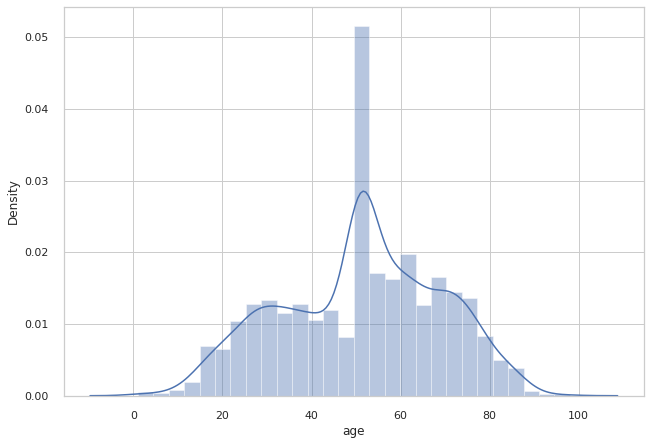

In [29]:
# looking at distribution of age 
sns.distplot(hp.age)

The 'age' variable appears to be a normal distribution, peaking at arounf 50-52.



In [30]:
print("Mean age:", hp.age.mean())
print("Median age:", hp.age.median())
print("Modal age:", hp.age.mode())

Mean age: 51.118452956124244
Median age: 51.154214206845786
Modal age: 0    51.154214
dtype: float64


The mean, median, and mode are all the same (51). This is unusual but understandable because we have imputed the null values with the mean age.



In [31]:
# calculating age range
min_age = hp.age.min()
max_age = hp.age.max()
range_age = max_age - min_age
print("The youngest age is {}, the oldest age is {}.".format(min_age, max_age))
print("Therefore there's a range of {}".format(range_age))

The youngest age is 1.0, the oldest age is 98.0.
Therefore there's a range of 97.0


In [32]:
# splitting age into 9 age groups using the following ranges:
# 0-9, 10-18, 19-27, 28-36, 37-54, 55-63, 64-72, 73-81 and 82-99

conditions = [
    ((hp.age >= 0) & (hp.age <= 9)),
    ((hp.age >= 10) & (hp.age <= 18)),
    ((hp.age >= 19) & (hp.age <= 27)),
    ((hp.age >= 28) & (hp.age <= 36)),
    ((hp.age >= 37) & (hp.age <= 54)),
    ((hp.age >= 55) & (hp.age <= 63)),
    ((hp.age >= 64) & (hp.age <= 72)),
    ((hp.age >= 73) & (hp.age <= 81)),
    ((hp.age >= 82) & (hp.age <= 99))
]
choices = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

hp['age_range'] = np.select(conditions, choices)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f11d906fa10>],
      dtype=object)

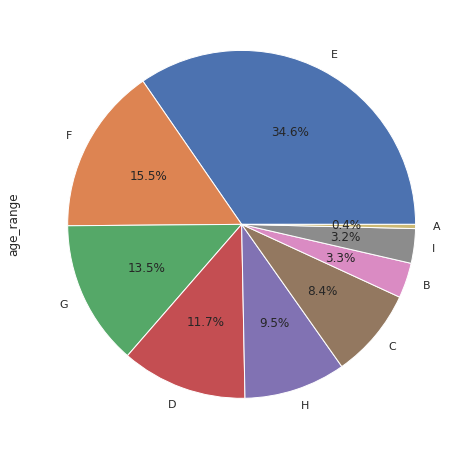

In [33]:
# plotting the age ranges in a pie chart
hp.age_range.value_counts().plot(kind = 'pie', autopct = '%0.1f%%',
                                       figsize = [10, 8], subplots = True)

We can see that majority of the respondents are in Group E, which is between 37 and 54. The age range with the fewest patients is Group A (0-9 years).



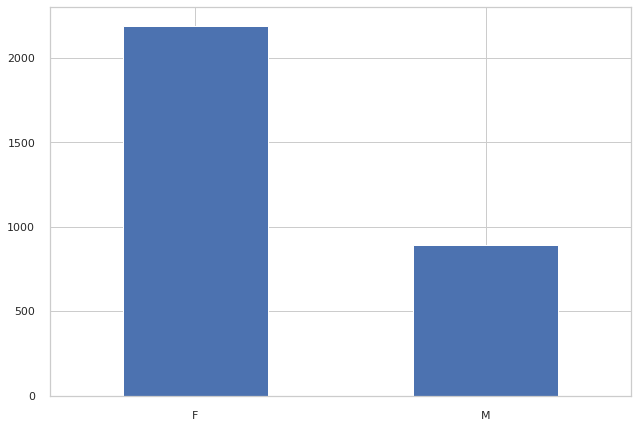

In [34]:
# previewing our data set's gender distribution
hp.sex.value_counts().plot(kind = 'bar', rot = 0)

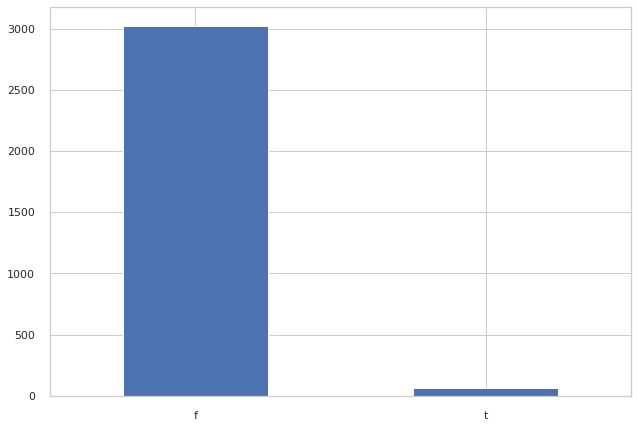

In [35]:
# distribution of pregnancy
hp.pregnant.value_counts().plot(kind = 'bar', rot = 0)

Majority of the respondents are not pregnant. Very few are, which makes it hard to accurately investigate whether there is a link between pregnancy and hypothyroidism. Also, we have to confirm that those marked pregnant are not male, otherwise that would be a wrong/invalid record.



In [36]:
hp.groupby('pregnant').sex.value_counts()


pregnant   
f         F    2131
          M     894
t         F      61
          M       0
Name: sex, dtype: int64

As expected, there are no pregnant males which makes valid sense. Of the 2,131 females remaining in the data set, only 61 are pregnant, which is not sufficient to explore the relationship between pregnancy and hypothyroidism, if such a relationship exists.



In [37]:
# creating lists containing the column names stored in their respective lists
# to make iterating through the data set easier
tests_measured = ['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 
                  'FTI_measured', 'TBG_measured']

categorical = ['on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication',
               'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid']

others = ['pregnant', 'sick', 'tumor', 'lithium', 'goitre']

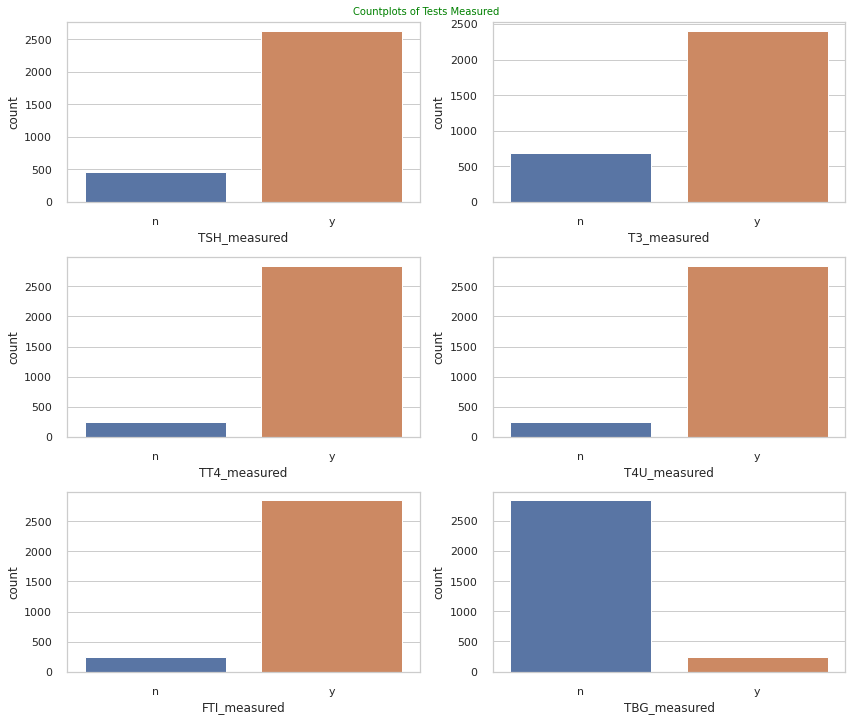

In [38]:
# plotting the distribution of the tests taken
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 10))
plt.suptitle('Countplots of Tests Measured', fontsize = 10, y = 1.0, 
             color = 'green')

for ax, data, column in zip(axes.flatten(), hp, tests_measured):
    sns.countplot(hp[column], ax = ax)
    
plt.tight_layout()

TSH, T3, TT4, T4U, and FTI show more 'yes' results than 'no' results to their respective tests. The test for TBG is the opposite which means that there might be something unusual about that test.



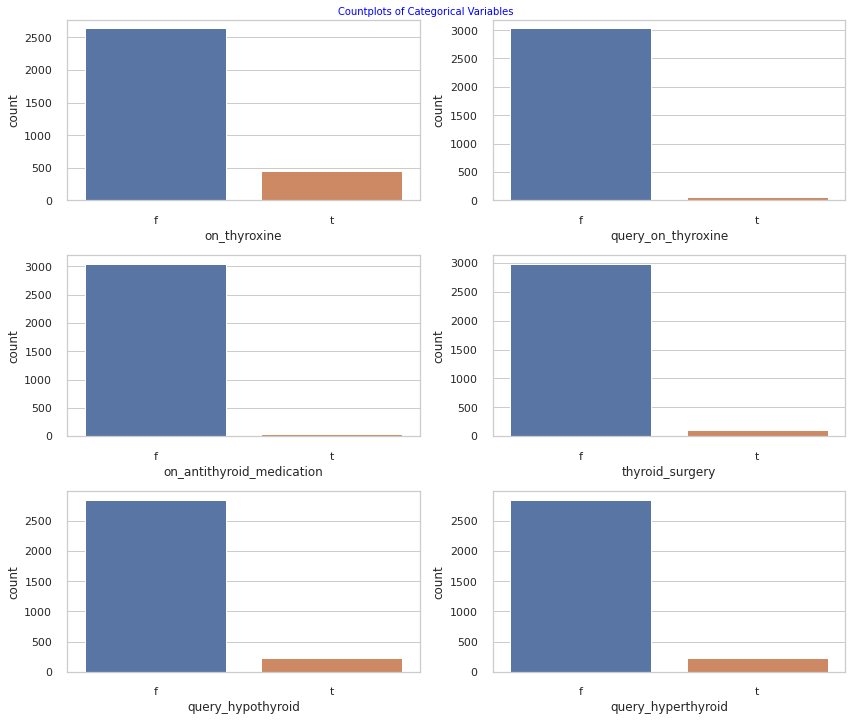

In [39]:
# plotting the distribution of medication & surgery
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 10))
plt.suptitle('Countplots of Categorical Variables', fontsize = 10, y = 1.0,
             color = 'blue')

for ax, data, column in zip(axes.flatten(), hp, categorical):
    sns.countplot(hp[column], ax = ax)
    
plt.tight_layout()

We see that majority of the patients haven't gone for medication or surgery related to hypothyroidism so this goes on to further prove the inapporpriatenness of this data set in answering the research question.



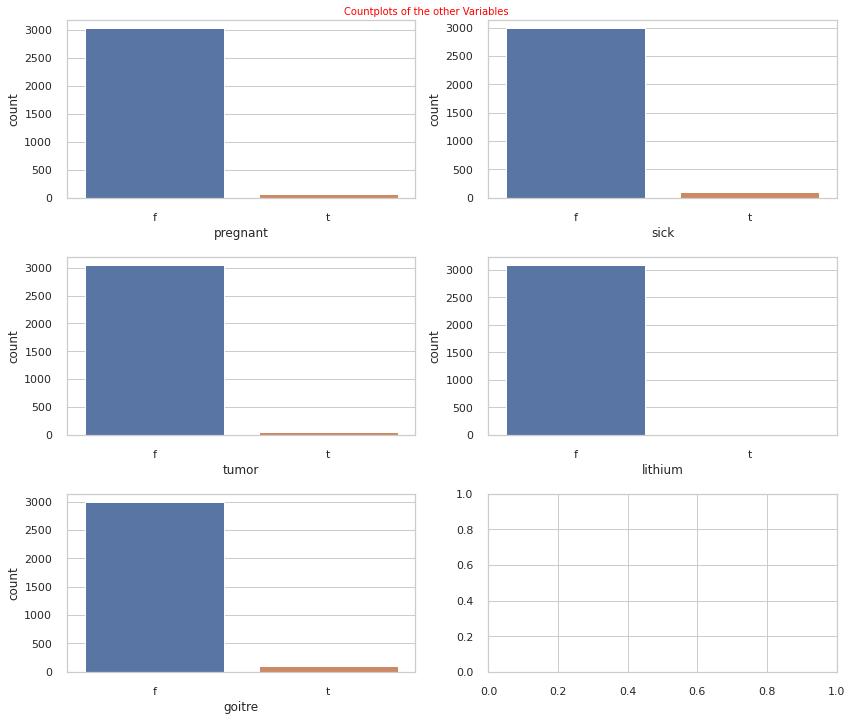

In [40]:
# plotting the distribution of the rest of the variables
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 10))
plt.suptitle('Countplots of the other Variables', fontsize = 10, y = 1.0,
             color = 'red')

for ax, data, column in zip(axes.flatten(), hp, others):
    sns.countplot(hp[column], ax = ax)
    
plt.tight_layout()


We can see that majority aren't pregnant or sick, and they don't have tumors, lithium, or goitres. As with the other variables, this data is biased and not appropriate enough to make an accurate and realistic analysis/prediction.



##1.5.2 Research-specific EDA ##

Since our research question is to focus on the factors that influence whether or not a person has hypothyroidism, we will now make the 'status' column our main focus during exploratory data analysis.



negative       2945
hypothyroid     141
Name: status, dtype: int64


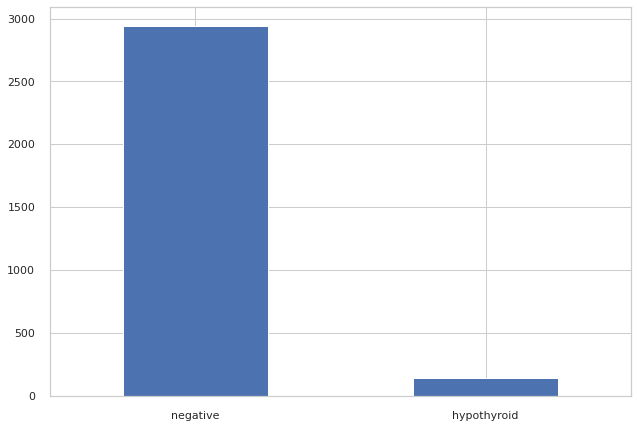

In [41]:
# distribution of hypothyroidism status
hp.status.value_counts().plot(kind = 'bar', rot = 0)
print(hp.status.value_counts())

It appears that most of the observations have reported 'negative'. Those without hypothyroidism outnumber those with it 2945 to 141 which makes this dataset very biased and also not appropriate enough to effectively and realistically answer the research question.



[Text(0, 0.5, 'Status'), Text(0.5, 1.0, 'Hypothyroidism per Age Range')]

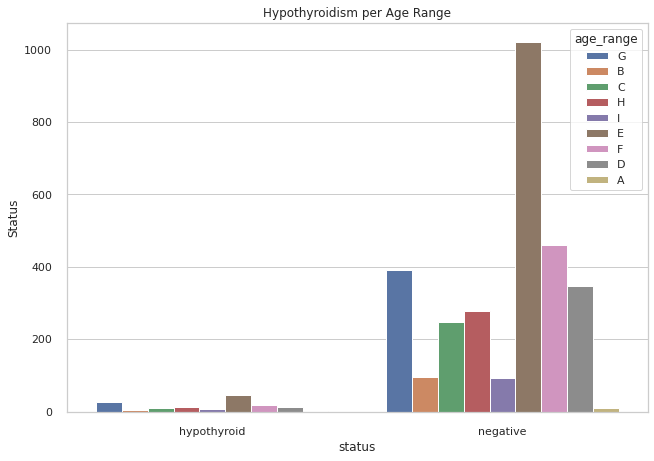

In [42]:
# previewing the distribution of hypothyroidism across the age ranges
hp_age = sns.countplot('status', hue = 'age_range', data = hp)
hp_age.set(title = "Hypothyroidism per Age Range", ylabel = "Status")

We can see that the records for those with hypothyroid are very, very low compared to those who are negative. In both cases, Group E (ages 37-54) made up the vast majority while group A (0-9 years) made up the minority.



In [43]:
# hypothyroidism per pregnancy status
hp.groupby('status').pregnant.value_counts()

status        
hypothyroid  f     140
             t       1
negative     f    2885
             t      60
Name: pregnant, dtype: int64

Of the 61 pregnant women in our dataset, only 1 had hypothyroidism. Not only is this not generalizable, it is also too biased in determining whether pregnancy is a factor influencing hypothyroidism.



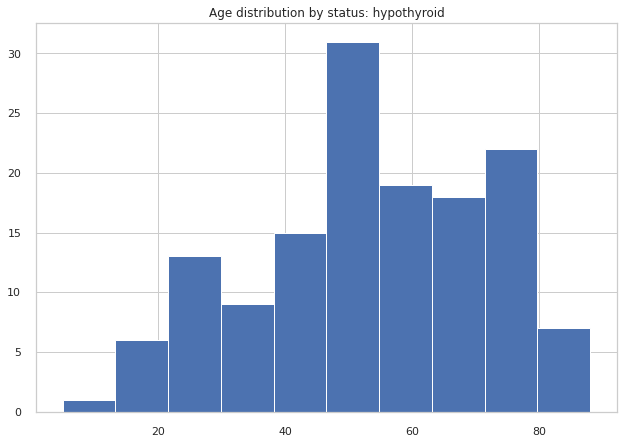

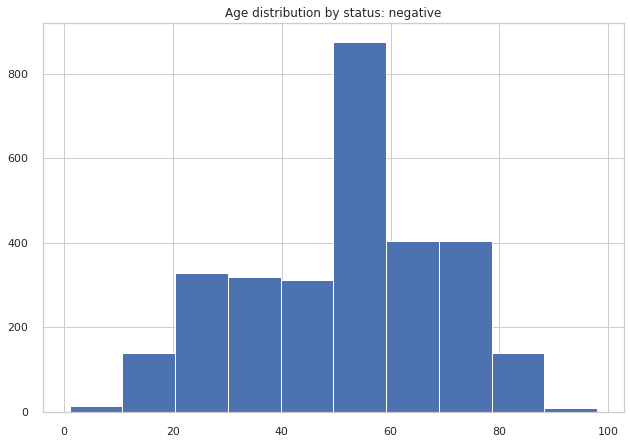

In [44]:
# status distribution across age
status = list(hp.status.unique())
for stat in status:
    hp.loc[hp.status == stat].age.hist()
    plt.title("Age distribution by status: {}".format(stat))
    plt.show()

Both appear to have normap distributions and their most frequently occuring values seem to be somewhere between 45 and 58.



In [45]:
# display the distribution of these based on status

hp_cat = tests_measured + categorical + others

for cat in hp_cat:
    print(hp.groupby('status')[cat].value_counts())
    print("\n")

status        
hypothyroid  y     140
             n       1
negative     y    2491
             n     454
Name: TSH_measured, dtype: int64


status        
hypothyroid  y     128
             n      13
negative     y    2278
             n     667
Name: T3_measured, dtype: int64


status        
hypothyroid  y     141
             n       0
negative     y    2705
             n     240
Name: TT4_measured, dtype: int64


status        
hypothyroid  y     141
             n       0
negative     y    2706
             n     239
Name: T4U_measured, dtype: int64


status        
hypothyroid  y     141
             n       0
negative     y    2707
             n     238
Name: FTI_measured, dtype: int64


status        
hypothyroid  n     138
             y       3
negative     n    2697
             y     248
Name: TBG_measured, dtype: int64


status        
hypothyroid  f     129
             t      12
negative     f    2511
             t     434
Name: on_thyroxine, dtype: int64


status 

To summarize the above results:

* most of the patients are female
* most of the patients' status is negative
* majority of the respondents are between 37-54 years of age
* most of the patients had carried out the necessary tests, e.g. TSH, T3, TT4, T4U, FTI, and TBG
* majority are on thyroxine
* majority reported false on query on thyroxine
* majority are not on antithyroid medication
* majority did not have thyroid surgery
* majority did not query on both hyperthyroid and hypothyroid
* majority are not pregnant or sick
* majority don't have tumors, lithium, or goitre

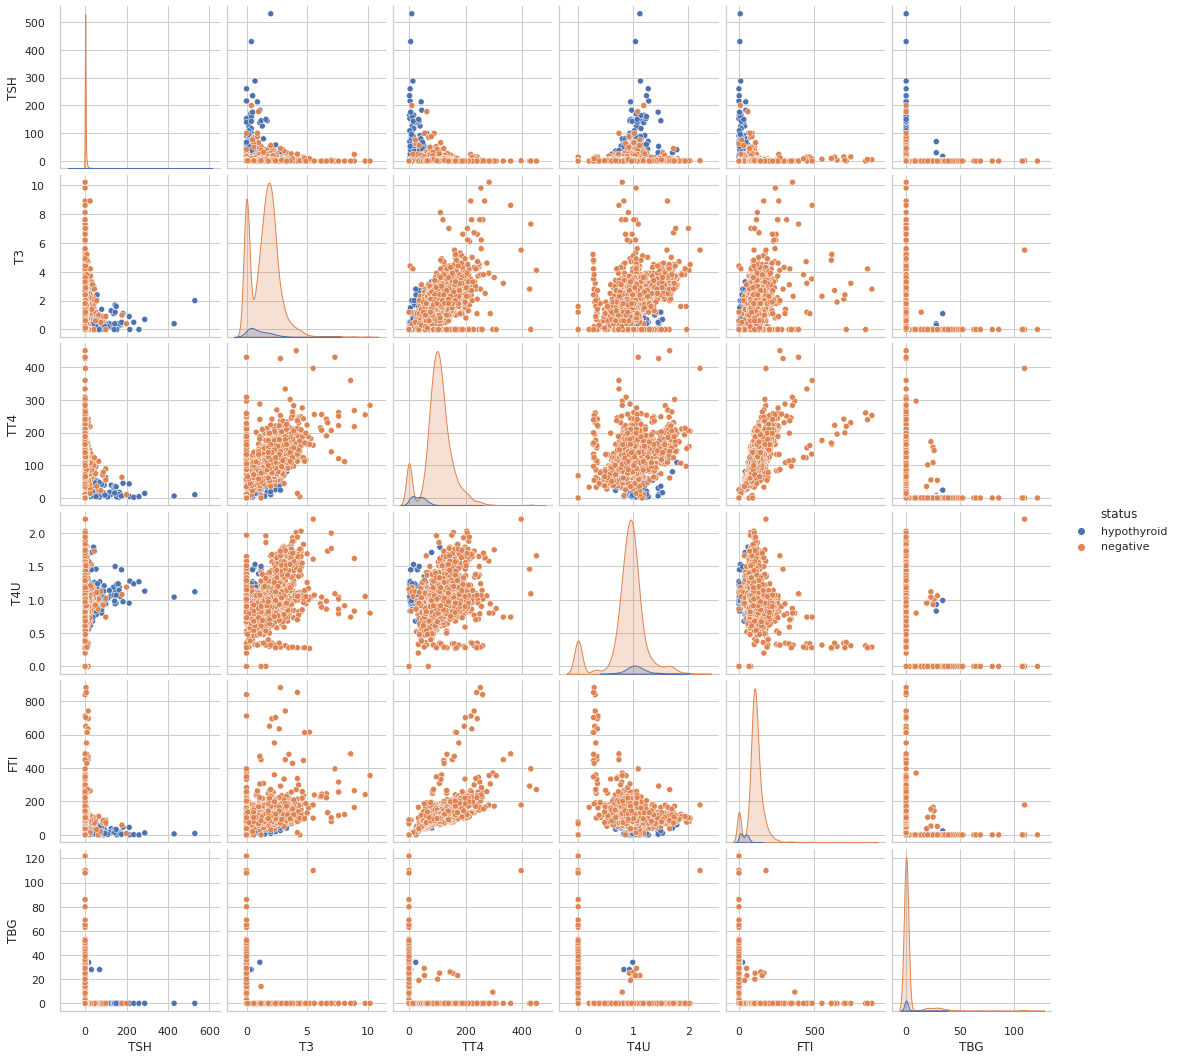

In [46]:
# scatterplot of test results
numerical = ['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

sns.pairplot(hp, kind = "scatter", diag_kind = "kde", vars = numerical,
            hue = "status")

Hyperthyroidism shows up more in TSH tests, indicating that that test is an important factor influencing it. We also see that linear models will not work well with this data so we can only use them for comparison purposes.



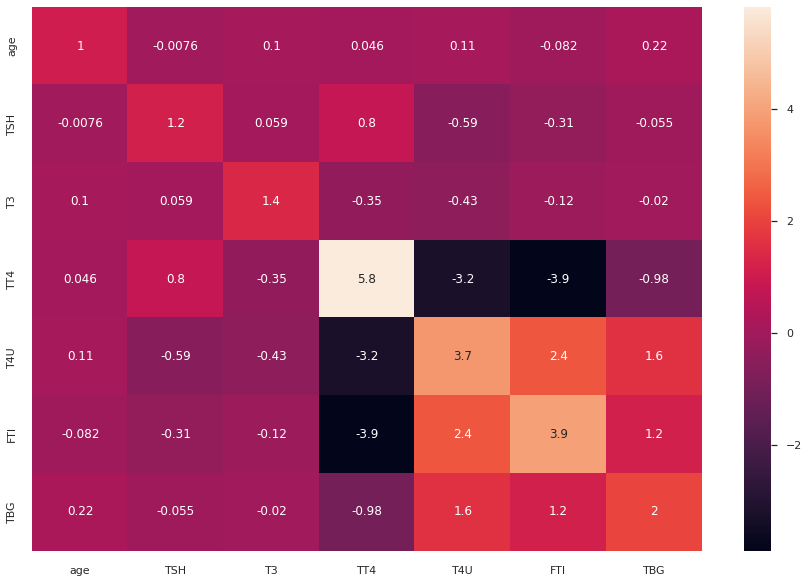

In [47]:
# investigating the correlation between variables
corr = hp.corr()
vif = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)

# using a heatmap to display the results
plt.figure(figsize = (15, 10))
sns.heatmap(vif, annot = True)

A Variance Inflation Factor (VIF) score of around 5 is problematic. While we don't have any such scores, we do however have two variables, TT4 and FTI that come close. We will drop them and their relevant tests, i.e. TT4_measured and FTI_measured respectively, and see if this data set's multicollinearity will be reduced.



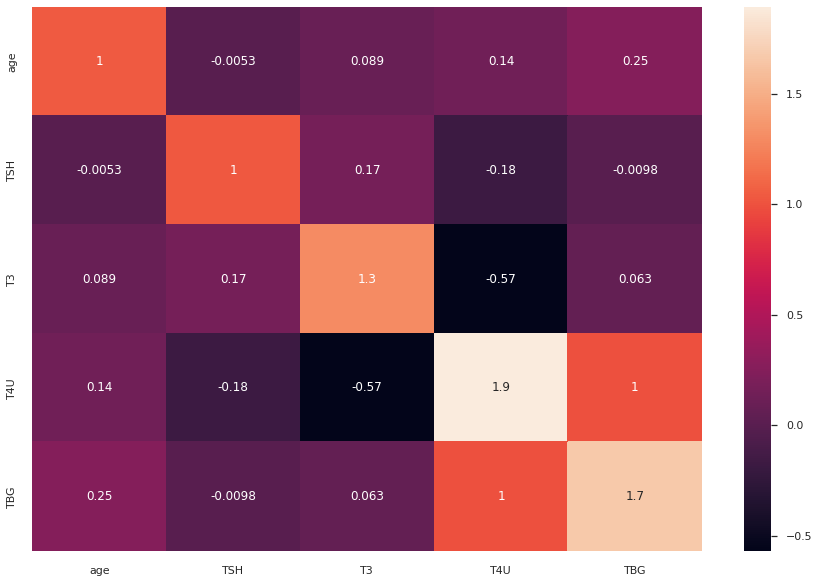

In [48]:
hp= hp.drop(columns = ['TT4_measured', 'TT4', 'FTI_measured', 'FTI'], axis = 1)

corr = hp.corr()
vif = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, 
                   columns = corr.columns)

plt.figure(figsize = (15, 10))
sns.heatmap(vif, annot = True)

This is better. We see that the VIF of T4U has decreased significantly from 2.8 to 1.2. This shows that it had some amount of collinearity with one of the variables that we have dropped.



In [49]:
# dropping columns that are no longer relevant
hp= hp.drop(columns = ['TSH_measured', 'T3_measured', 'T4U_measured',
                           'TBG_measured', 'age'], axis = 1)

In [50]:
# saving to csv to use as a checkpoint
hp.to_csv('hp_clean.csv', index = False)

# to reload from this checkpoint, uncomment the below line of code
#hp= pd.read_csv('hp_clean.csv')

# 1.6 MODELING 

## 1.6.2 Feature Engineering & Selection##

In [51]:
# previewing our data so we can determine which variables to encode
hp.head()

,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,T4U,TBG,age_range
0,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,30.0,0.6,1.48,0.0,G
1,hypothyroid,F,t,f,f,f,f,f,f,f,f,f,f,145.0,1.7,1.13,0.0,B
2,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,0.0,0.2,1.00,0.0,C
3,hypothyroid,F,f,f,f,f,f,f,f,f,f,f,f,430.0,0.4,1.04,0.0,C
4,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,7.3,1.2,1.28,0.0,H


In [52]:
from sklearn.preprocessing import LabelEncoder

encode = hp.columns.to_list()
encode.remove('TSH')
encode.remove('T3')
encode.remove('T4U')
encode.remove('TBG')
encode

['status',
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'thyroid_surgery',
 'query_hypothyroid',
 'query_hyperthyroid',
 'pregnant',
 'sick',
 'tumor',
 'lithium',
 'goitre',
 'age_range']

In [53]:
# encoding
from sklearn.preprocessing import LabelEncoder

# dictionary to store each unique variable class
class_dict = {}

for item in encode:
    encoder = LabelEncoder().fit(hp[item].unique())
    classed = encoder.classes_
    class_dict[item] = classed
    hp[item] = encoder.transform(hp[item].values)

# to decode, use the following structure
class_dict['age_range'][6]

'G'

We have successfully encoded our categorical variables and are now ready to do the actual modelling. While I intend to use all the variables that are now remaining, should I be required to select only a few, these are the variables that I think are most important:

* age (age_range now)
* sex
* TSH

##PART 1##

## 1.6.1 Random Forest

A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap Aggregation, commonly known as bagging.

The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees

Moreover, it is a pretty good indicator of the importance it assigns to your features.

The most important parameters to tune
* Maximum depth
* Minimum sample splits
* Node creation factor
* Number of features to use
* Number of trees to create

In [54]:
# splitting our data into features & labels
X = hp.drop(columns = ['status']).values
y = hp.status.values

# getting our feature names
features = hp.columns.to_list()
features.remove('status')

print(X.shape)
print(y.shape)

(3086, 17)
(3086,)


In [55]:
# splitting into training & test data
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 0)

In [56]:
# importing the random forest regressor
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 200, min_samples_split = 20,
                              max_depth = 5)

# fitting our model to our training data
forest.fit(X_train, y_train)

# make predictions using our forest
y_pred = forest.predict(X_test)

In [57]:
# compare actual values with predicted values
compare = pd.DataFrame({'Actual' : y_test.flatten(),
                        'Predicted' : y_pred.flatten()})

# previewing our summary statistics
compare.describe()

,Actual,Predicted
count,618.000000,618.000000
mean,0.959547,0.951956
std,0.197179,0.165545
min,0.000000,0.027037
25%,1.000000,0.996928
50%,1.000000,0.999891
75%,1.000000,0.999915
max,1.000000,0.999915


Our model seems to have done a good job at making the predictions as seen by how close the summary statistics of the predicted values are to the those of the actual values. Let us properly and accurately assess the accuracy of the model using the sklearn metrics.



In [58]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.03390001485873018
Mean Squared Error: 0.015525424295273777
Root Mean Squared Error: 0.12460106057042122


The MSE and RMSE values of our random forest are very small meaning our model has done a really good job.

We now want to see what tree number 24 looks like.

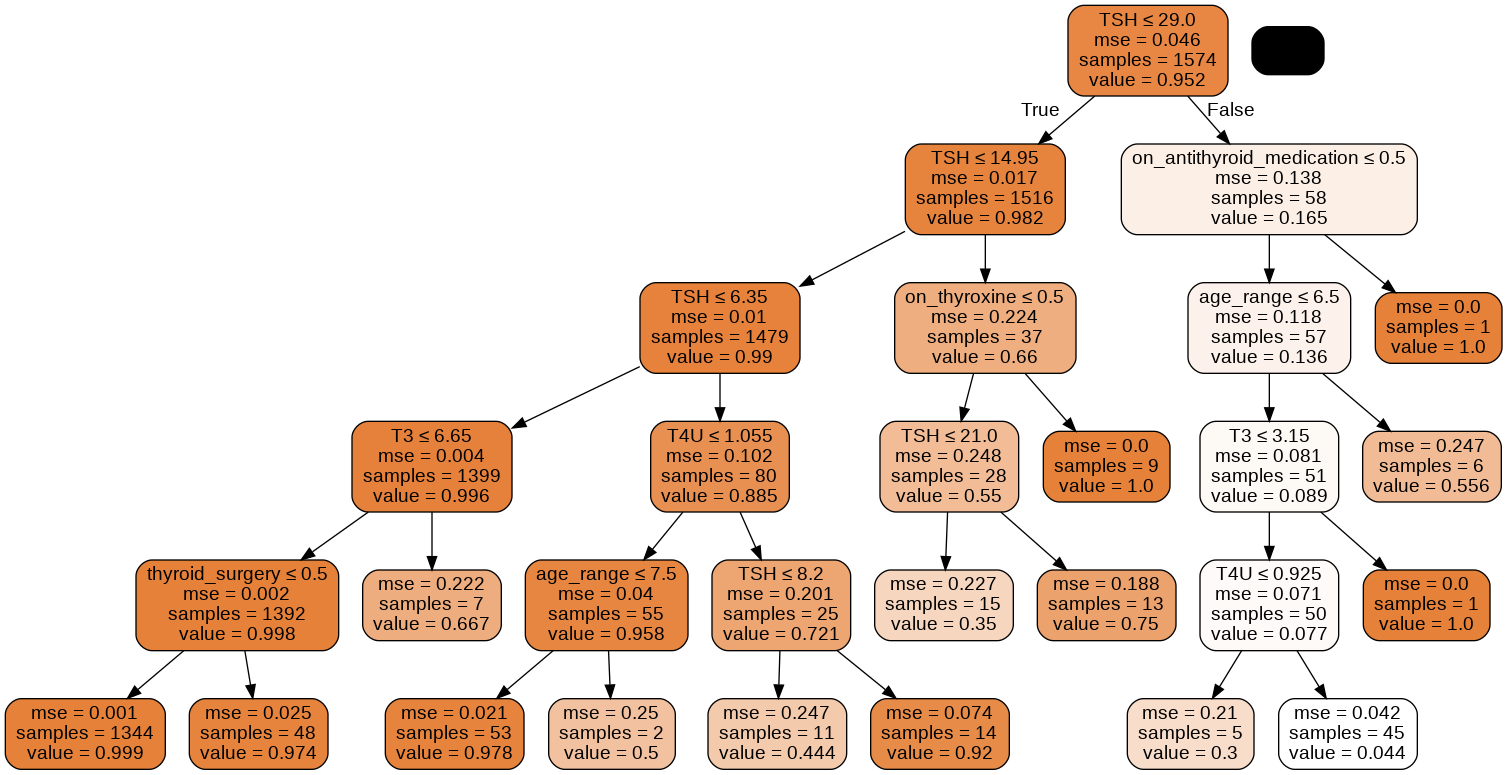

In [59]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

# picks a specific tree from the forest
tree = forest.estimators_[23]

export_graphviz(tree, out_file = dot_data, filled = True, rounded = True,
                special_characters = True, feature_names = features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid.png')
Image(graph.create_png())

In [60]:
# now to get the importance levels of our features
importances = list(tree.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance 
                       in zip(features, importances)]

# sort in descending order
feature_importances = sorted(feature_importances, key = lambda x: x[1], 
                             reverse = True)
feature_importances

[('TSH', 0.86),
 ('on_antithyroid_medication', 0.03),
 ('T3', 0.03),
 ('T4U', 0.03),
 ('age_range', 0.03),
 ('on_thyroxine', 0.02),
 ('sex', 0.0),
 ('query_on_thyroxine', 0.0),
 ('thyroid_surgery', 0.0),
 ('query_hypothyroid', 0.0),
 ('query_hyperthyroid', 0.0),
 ('pregnant', 0.0),
 ('sick', 0.0),
 ('tumor', 0.0),
 ('lithium', 0.0),
 ('goitre', 0.0),
 ('TBG', 0.0)]

As we can see, TSH was the most influential variable on a person's hypothyroid status. It is followed by T3, on_antithyroid_medication, age_range, on_thyroine, and goitre although these subsequent variables have very little impact. It is worth noting that these feature importance levels change with the tree used so just because a certain tree got a specific variable as its most impactful feature does not necessarily mean that the same holds true for all trees in the forest.



## 1.6.2 Ada Boost Classifier

AdaBoost, short for Adaptive Boosting.

AdaBoost rarely suffers from overfitting problems in low noise data cases.

However, recent studies with highly noisy patterns have clearly shown that overfitting can occur.

Ada-boost, like Random Forest Classifier is another ensemble classifier. 

(Ensemble classifier are made up of multiple classifier algorithms and whose output is combined result of output of those classifier algorithms).


 - --Parameters to tune
* Parameters of one initial tree
* Number of trees to create




In [61]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(max_depth = 5)

# training our model on our training data
decision_tree = decision_tree.fit(X_train, y_train)

# making predictions on the test data
decision_y_pred = decision_tree.predict(X_test)

# comparing actual values to predicted values
decision_compare = pd.DataFrame({'Actual' : y_test.flatten(),
                        'Predicted' : decision_y_pred.flatten()})

# previewing our summary statistics
decision_compare.describe()

,Actual,Predicted
count,618.000000,618.000000
mean,0.959547,0.950206
std,0.197179,0.188133
min,0.000000,0.000000
25%,1.000000,0.996101
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [62]:
from sklearn.ensemble import AdaBoostRegressor

# creating our classifier with 200 trees of depth 1
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 1), 
                            n_estimators = 200)

# fitting our model to our training data
ada_reg.fit(X_train, y_train)

# making predictions
ada_reg_y_pred = ada_reg.predict(X_test)

# comparing actual values to predicted values
ada_reg_compare = pd.DataFrame({'Actual' : y_test.flatten(),
                        'Predicted' : ada_reg_y_pred.flatten()})

# previewing our summary statistics
ada_reg_compare.describe()

,Actual,Predicted
count,618.000000,618.000000
mean,0.959547,0.949094
std,0.197179,0.170054
min,0.000000,0.183333
25%,1.000000,0.986797
50%,1.000000,0.986797
75%,1.000000,0.986797
max,1.000000,0.986797


In [63]:
# evaluating accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ada_reg_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ada_reg_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ada_reg_y_pred)))

Mean Absolute Error: 0.04088668728601913
Mean Squared Error: 0.021443839150746855
Root Mean Squared Error: 0.14643715085574036


While our scores using this model are low and good, we can see that the RMSE of our Ada-boosted model is slightly larger than that of our random forest. This means that the random forest model is preferential to the Ada-boosted model.

## 1.6.3 Gradient boosting Classifier

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

Gradient boosting is a greedy algorithm and can overfit a training dataset quickly. 

It can benefit from regularization methods that penalize various parts of the algorithm and generally improve the performance of the algorithm by reducing overfitting.

Parameters to tune
* Maximum depth
* Minimum sample splits
* Node creation factor
* Learning rate
* Number of trees to create


In [64]:
from sklearn.ensemble import GradientBoostingRegressor

# setting different learning rates, so that we can compare the performance of 
# the classifier's performance at different learning rates
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    grad = GradientBoostingRegressor(n_estimators = 200, max_depth = 2,
                                     learning_rate = learning_rate,
                                     random_state = 0)
    grad.fit(X_train, y_train)

    print("Learning rate:", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(grad.score(X_train,
                                                                   y_train)))
    print("Accuracy score (validation): {0:.3f}".format(grad.score(X_test,
                                                                     y_test)))
    print("*******************************************")

Learning rate: 0.05
Accuracy score (training): 0.686
Accuracy score (validation): 0.568
*******************************************
Learning rate: 0.075
Accuracy score (training): 0.711
Accuracy score (validation): 0.572
*******************************************
Learning rate: 0.1
Accuracy score (training): 0.732
Accuracy score (validation): 0.579
*******************************************
Learning rate: 0.25
Accuracy score (training): 0.821
Accuracy score (validation): 0.516
*******************************************
Learning rate: 0.5
Accuracy score (training): 0.873
Accuracy score (validation): 0.486
*******************************************
Learning rate: 0.75
Accuracy score (training): 0.899
Accuracy score (validation): 0.480
*******************************************
Learning rate: 1
Accuracy score (training): 0.910
Accuracy score (validation): 0.442
*******************************************


We can see that a learning rate of 0.1 gives us the best performance when it comes to validating, and good performance when it comes to training so we will use it as our parameter.



In [65]:
# now to use our selected learning rate to model
grad2 = GradientBoostingRegressor(n_estimators = 200, max_depth = 2, 
                                  learning_rate = 0.1, random_state = 0)

# fitting to training data
grad2.fit(X_train, y_train)

# making predictions
grad2_y_pred = grad2.predict(X_test)

# comparing actual values to predicted values
grad2_compare = pd.DataFrame({'Actual' : y_test.flatten(),
                        'Predicted' : grad2_y_pred.flatten()})

# previewing our summary statistics
grad2_compare.describe()

,Actual,Predicted
count,618.000000,618.000000
mean,0.959547,0.952476
std,0.197179,0.171069
min,0.000000,-0.237883
25%,1.000000,0.994305
50%,1.000000,0.999621
75%,1.000000,1.001699
max,1.000000,1.174719


Our model seems to have performed so well there is some level of overfitting. We will now assess its metrics.



In [66]:
# evaluating accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, grad2_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, grad2_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, grad2_y_pred)))

Mean Absolute Error: 0.03737215067545912
Mean Squared Error: 0.016333696270170884
Root Mean Squared Error: 0.1278033499958858


Our Gradient-boosted RMSE score is low, indicating that this model is performing really well. While it performs better than the Ada-boosted model, especially thanks to the optimized parameters, it still performs very slightly worse than our random forest model. However, I doubt the difference is statistically significant, and would recommend a combination of random forest and gradient boosting with optimized parameters where possible.

## PART 2

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane.

In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples.

--- Parameters to tune:

      * Kernel
      * C
      * Gamma
Creating SVC using different kernels

## 1.6.4 Linear Kernel

In [67]:
# ensuring our features & label still stand
X = hp.drop(columns = 'status').values
y = hp['status'].values
print(X.shape)
print(y.shape)

(3086, 17)
(3086,)


In [68]:
# applying Principal Component Analysis (PCA) to reduce the number of variables
# for our data
from sklearn.decomposition import PCA
pca = PCA(n_components = 3).fit(X)
X = pca.transform(X)
X.shape

(3086, 3)

In [69]:
# splitting into training & testing data
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 0)

In [70]:
# importing our SVM model and setting kernel to linear

from sklearn.svm import SVC
linear = SVC(kernel = 'linear')

# fitting to training data
linear.fit(X_train, y_train)

# making predictions
lin_y_pred = linear.predict(X_test)

# assessing the model
from sklearn.metrics import confusion_matrix, accuracy_score

print("Linear kernel score:", accuracy_score(y_test, lin_y_pred))
print("Linear kernel confusion matrix:\n", confusion_matrix(y_test, lin_y_pred))

Linear kernel score: 0.9741100323624595
Linear kernel confusion matrix:
 [[ 13  12]
 [  4 589]]


## 1.6.4 Polynomial Kernel##

In [ ]:
# trying it out with a polynomial kernel
polyclassifier = SVC(kernel = 'poly', gamma = 'auto')
# training the model
polyclassifier.fit(X_train, y_train)
# making prediction
poly_y_pred = poly.predict(X_test)

# assessing the model
print("Polynomial kernel score:", accuracy_score(y_test, poly_y_pred))
print("Polynomial kernel confusion matrix:\n", confusion_matrix(y_test, poly_y_pred))

##1.6.5 Radial Basis Function (RBF) Kernel##

In [72]:
# now doing it with rbf kernel
rbf = SVC(kernel = 'rbf', gamma = 'auto')

# training the model
rbf.fit(X_train, y_train)

# making prediction
rbf_y_pred = rbf.predict(X_test)

# assessing the model
print("RBF kernel score:", accuracy_score(y_test, rbf_y_pred))
print("RBF kernel confusion matrix:\n", confusion_matrix(y_test, rbf_y_pred))

RBF kernel score: 0.9676375404530745
RBF kernel confusion matrix:
 [[ 11  14]
 [  6 587]]


As we can see, the linear kernel is the best performing kernel model

##1.7 Conclusion & Challenging the Solution##

Overall, we see that our models have all performed well. The only problem here is that the data set is very imbalanced and biased. It would have been better to have a dataset that has roughly the same number of male and female patients, and the same for those with hypothyroid and those without. Also, it would have been great to have a data set with fewer missing values.

Furthermore, the lack of domain knowledge inhibited me from properly attempting to answer the research question. I did not understand what exactly terms like 'on_thyroxine', 'TSH', and so I could not fully investigate the relevant variables.

With that said, I should have done even more exhaustive exploratory data analysis, especially bivariate and multivariate analysis. Finally, I should play around with the parameters of the different models like the degree, maximum depth, number of estimators, and so on so as to find the parameters that best optimize the respective models.